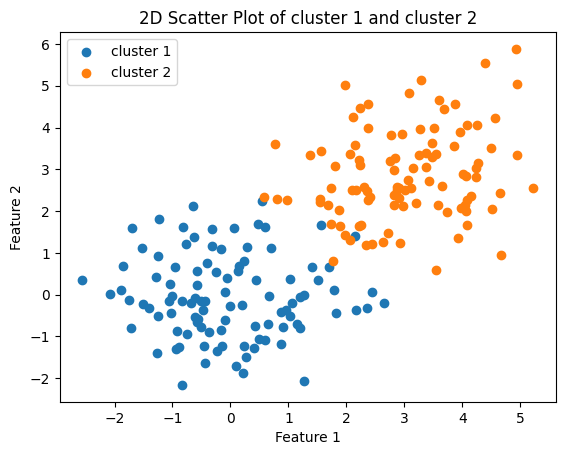

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#The first cluster is a dataset of 100 datapoints with 3 features
cluster1 = np.random.randn(100, 2)
#The second cluster is similar but includes a mean shift or shift by three from the origin
cluster2 = np.random.randn(100, 2) + np.array([3,3])


# Plotting the Clusters in a 2 dimensional space


#fig is the entire window of the plot
# ax is the array of axes inside the window
fig, ax = plt.subplots()


# Plots the datapoints of each cluster by taking them feature wise
ax.scatter(cluster1[:, 0], cluster1[:, 1], label='cluster 1')
ax.scatter(cluster2[:, 0], cluster2[:, 1], label='cluster 2')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('2D Scatter Plot of cluster 1 and cluster 2')



# legend() explains what each mark or line in the plot represents
ax.legend() 

plt.show()


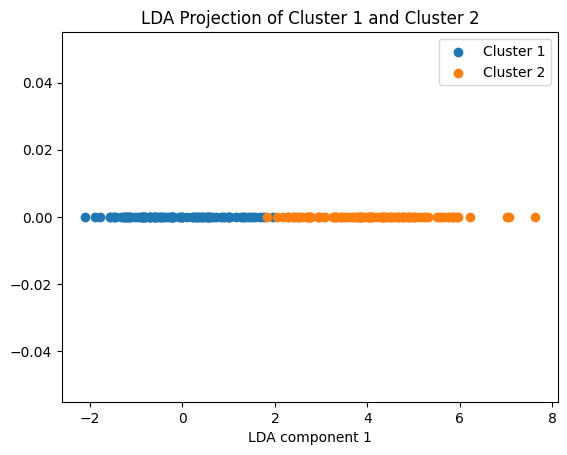

In [3]:
# Plotting the LDA dimensions of the above clusters


# Calculate the mean of the clusters
mean_cluster1 = np.mean(cluster1, axis=0)
mean_cluster2 = np.mean(cluster2, axis=0)

# Calculate the within-class scatter matrix
within_cluster_scatter = np.dot((cluster1 - mean_cluster1).T, (cluster1 - mean_cluster1)) + np.dot((cluster2 - mean_cluster2).T, (cluster2 - mean_cluster2))

# Calculate the between-class scatter matrix
between_cluster_scatter = np.dot((mean_cluster1 - mean_cluster2).reshape(2, 1), (mean_cluster1 - mean_cluster2).reshape(1,2))

# Calculate the eigenvalues and eigenvectors
# !!!
eigenval, eigenvector = np.linalg.eig(np.linalg.inv(within_cluster_scatter).dot(between_cluster_scatter))

# Sort eigenvalues and eigenvectors
# Returns the indices that would sort the eigenval array in reverse order
sorted_index = np.argsort(eigenval)[::-1]
# This uses the indices to sort the eigenvectors from highest to lowest
eigenvector = eigenvector[:, sorted_index]

# This represents the number of eigen vectors we want to select for the projection
num_components = 1
# This selects the eigenvectors of the first 1 column in the matrix
selected_eigenvectors = eigenvector[:, :num_components]

# Taking the clusters and projecting it into the space defined by the eigenvectors
lda_projection_cluster1 = np.dot(cluster1, selected_eigenvectors)
lda_projection_cluster2 = np.dot(cluster2, selected_eigenvectors)


plt.scatter(lda_projection_cluster1[:, 0], np.zeros_like(lda_projection_cluster1), label="Cluster 1")
plt.scatter(lda_projection_cluster2[:, 0], np.zeros_like(lda_projection_cluster2), label="Cluster 2")
plt.xlabel('LDA component 1')
plt.title("LDA Projection of Cluster 1 and Cluster 2")
plt.legend()
plt.show()


